In [1]:
from hilbert import algebra
from hilbert import operators
from hilbert import spaces

from hilbert.curves import lib

import pandas
import numpy

from matplotlib import pyplot

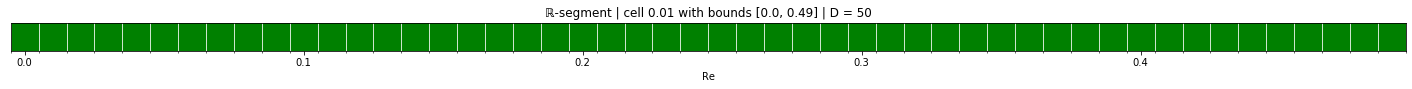

(<Figure size 1800x72 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bb9369400>)

In [2]:
## Analytical definition of Fourier basis
R1L2 = spaces.R1LebesgueSpace(0, 0.49, 50)  # make L²-space over ℝ
R1L2.bases.plot_domain()  # space domain

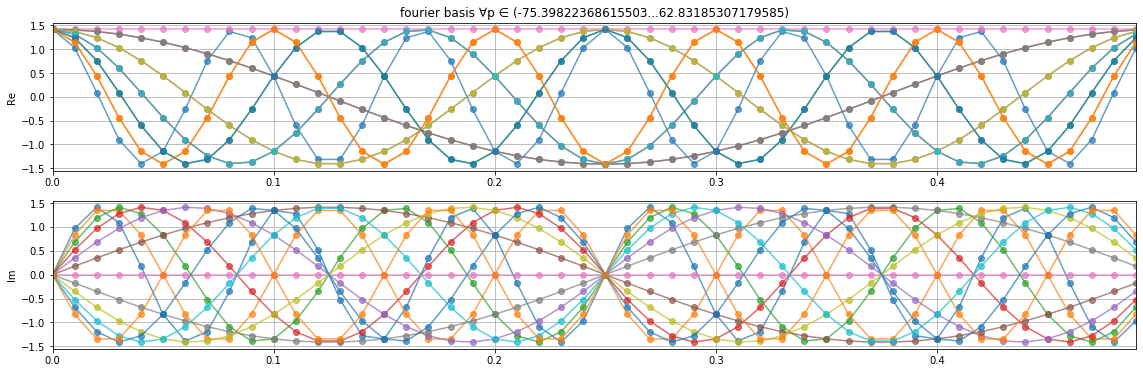

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bb6c00a90>,
       dtype=object))

In [3]:
R1L2.show_basis_slice('fourier', 0.19, 0.30, style='-o', alpha=0.7)  # Fourier (created on demand) sinusoids

In [4]:
R1L2[:, 'delta']  # create (when needed) and return position basis
R1L2.bases.o.dropna()  # only the demanded Fourier curves were created

,fourier,delta
0.19,(1.414213562373095)exp(75.39822368615503j)x,(10.0)δ(x - 0.19)
0.20,(1.414213562373095)exp(62.83185307179585j)x,(10.0)δ(x - 0.2)
0.21,(1.414213562373095)exp(50.26548245743669j)x,(10.0)δ(x - 0.21)
0.22,(1.414213562373095)exp(37.69911184307752j)x,(10.0)δ(x - 0.22)
0.23,(1.414213562373095)exp(25.13274122871833j)x,(10.0)δ(x - 0.23)
0.24,(1.414213562373095)exp(12.566370614359185j)x,(10.0)δ(x - 0.24)
0.25,(1.414213562373095)exp(-0j)x,(10.0)δ(x - 0.25)
0.26,(1.414213562373095)exp(-12.566370614359185j)x,(10.0)δ(x - 0.26)
0.27,(1.414213562373095)exp(-25.13274122871837j)x,(10.0)δ(x - 0.27)
0.28,(1.414213562373095)exp(-37.699111843077546j)x,(10.0)δ(x - 0.28)


In [5]:
assert R1L2.is_basis('fourier')  # completes the basis on demand
assert R1L2.is_orthonormal('fourier')

In [6]:
## Numerical definition of same Fourier basis
F = R1L2.fourier_op  # unitary operator of Fourier vectors
R1L2.map_basis(F, 'p')  # create the basis by mapping F to delta basis
PF = F.toggle_polar().rename(columns=R1L2.fourier_labels)  # Fourier basis matrix in polar form
round(PF, (2, 3)).o

,-314.159265,-301.592895,-289.026524,-276.460154,-263.893783,-251.327412,-238.761042,-226.194671,-213.628300,-201.061930,...,188.495559,201.061930,213.628300,226.194671,238.761042,251.327412,263.893783,276.460154,289.026524,301.592895
0.00,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,...,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0,0.14·ej0.0
0.01,0.14·ej3.142,0.14·ej3.016,0.14·ej2.89,0.14·ej2.765,0.14·ej2.639,0.14·ej2.513,0.14·ej2.388,0.14·ej2.262,0.14·ej2.136,0.14·ej2.011,...,0.14·ej-1.885,0.14·ej-2.011,0.14·ej-2.136,0.14·ej-2.262,0.14·ej-2.388,0.14·ej-2.513,0.14·ej-2.639,0.14·ej-2.765,0.14·ej-2.89,0.14·ej-3.016
0.02,0.14·ej-0.0,0.14·ej-0.251,0.14·ej-0.503,0.14·ej-0.754,0.14·ej-1.005,0.14·ej-1.257,0.14·ej-1.508,0.14·ej-1.759,0.14·ej-2.011,0.14·ej-2.262,...,0.14·ej2.513,0.14·ej2.262,0.14·ej2.011,0.14·ej1.759,0.14·ej1.508,0.14·ej1.257,0.14·ej1.005,0.14·ej0.754,0.14·ej0.503,0.14·ej0.251
0.03,0.14·ej3.142,0.14·ej2.765,0.14·ej2.388,0.14·ej2.011,0.14·ej1.634,0.14·ej1.257,0.14·ej0.88,0.14·ej0.503,0.14·ej0.126,0.14·ej-0.251,...,0.14·ej0.628,0.14·ej0.251,0.14·ej-0.126,0.14·ej-0.503,0.14·ej-0.88,0.14·ej-1.257,0.14·ej-1.634,0.14·ej-2.011,0.14·ej-2.388,0.14·ej-2.765
0.04,0.14·ej-0.0,0.14·ej-0.503,0.14·ej-1.005,0.14·ej-1.508,0.14·ej-2.011,0.14·ej-2.513,0.14·ej-3.016,0.14·ej2.765,0.14·ej2.262,0.14·ej1.759,...,0.14·ej-1.257,0.14·ej-1.759,0.14·ej-2.262,0.14·ej-2.765,0.14·ej3.016,0.14·ej2.513,0.14·ej2.011,0.14·ej1.508,0.14·ej1.005,0.14·ej0.503
0.05,0.14·ej-3.142,0.14·ej2.513,0.14·ej1.885,0.14·ej1.257,0.14·ej0.628,0.14·ej-0.0,0.14·ej-0.628,0.14·ej-1.257,0.14·ej-1.885,0.14·ej-2.513,...,0.14·ej3.142,0.14·ej2.513,0.14·ej1.885,0.14·ej1.257,0.14·ej0.628,0.14·ej0.0,0.14·ej-0.628,0.14·ej-1.257,0.14·ej-1.885,0.14·ej-2.513
0.06,0.14·ej-0.0,0.14·ej-0.754,0.14·ej-1.508,0.14·ej-2.262,0.14·ej-3.016,0.14·ej2.513,0.14·ej1.759,0.14·ej1.005,0.14·ej0.251,0.14·ej-0.503,...,0.14·ej1.257,0.14·ej0.503,0.14·ej-0.251,0.14·ej-1.005,0.14·ej-1.759,0.14·ej-2.513,0.14·ej3.016,0.14·ej2.262,0.14·ej1.508,0.14·ej0.754
0.07,0.14·ej-3.142,0.14·ej2.262,0.14·ej1.382,0.14·ej0.503,0.14·ej-0.377,0.14·ej-1.257,0.14·ej-2.136,0.14·ej-3.016,0.14·ej2.388,0.14·ej1.508,...,0.14·ej-0.628,0.14·ej-1.508,0.14·ej-2.388,0.14·ej3.016,0.14·ej2.136,0.14·ej1.257,0.14·ej0.377,0.14·ej-0.503,0.14·ej-1.382,0.14·ej-2.262
0.08,0.14·ej-0.0,0.14·ej-1.005,0.14·ej-2.011,0.14·ej-3.016,0.14·ej2.262,0.14·ej1.257,0.14·ej0.251,0.14·ej-0.754,0.14·ej-1.759,0.14·ej-2.765,...,0.14·ej-2.513,0.14·ej2.765,0.14·ej1.759,0.14·ej0.754,0.14·ej-0.251,0.14·ej-1.257,0.14·ej-2.262,0.14·ej3.016,0.14·ej2.011,0.14·ej1.005
0.09,0.14·ej3.142,0.14·ej2.011,0.14·ej0.88,0.14·ej-0.251,0.14·ej-1.382,0.14·ej-2.513,0.14·ej2.639,0.14·ej1.508,0.14·ej0.377,0.14·ej-0.754,...,0.14·ej1.885,0.14·ej0.754,0.14·ej-0.377,0.14·ej-1.508,0.14·ej-2.639,0.14·ej2.513,0.14·ej1.382,0.14·ej0.251,0.14·ej-0.88,0.14·ej-2.011


In [7]:
assert (R1L2[:, 'fourier'] == R1L2.bases.o['p']).all()

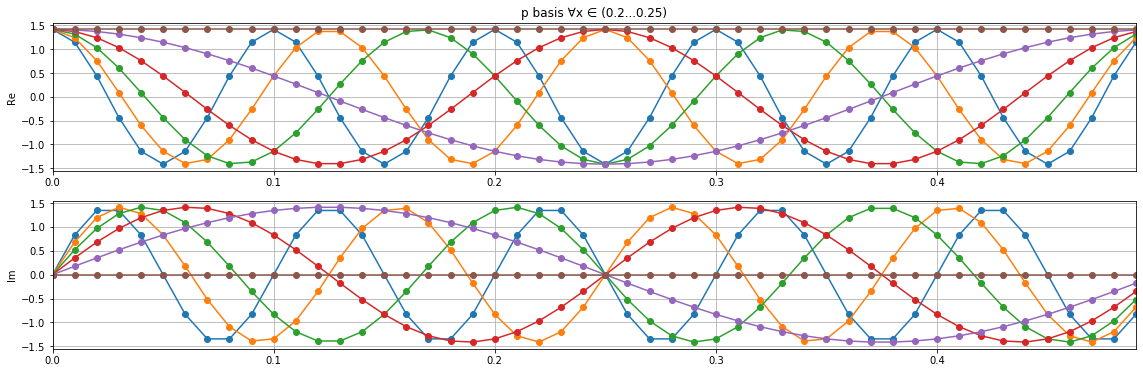

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bb6963f28>,
       dtype=object))

In [8]:
R1L2.show_basis_slice('p', 0.2, 0.25, style='-o')  # Fourier sinusoids

In [9]:
assert F.is_unitary() is True  # by construction

z = F.at(0.35, 0.49)
F.put(0.35, 0.49, z + 10**(-9))

assert F.is_unitary() is False

F.put(0.35, 0.49, z)

assert F.is_unitary() is True

In [10]:
# Since U is unitary:
assert R1L2.is_basis('p')
assert R1L2.is_orthonormal('p')

In [11]:
# images are 'delta' basis components - columns of F
assert all((w.image.i == (1/numpy.sqrt(R1L2.bases.measure))*F.o[ix]).all() for ix, w in R1L2.bases.o['p'].items())

In [12]:
w = 0.5*R1L2(lib.Exp(1, 2), lib.Exp(1, -3))
wcoords = R1L2.coords('p', w)  # coordinates of w in the 'p' basis
assert w == R1L2.vector('p', wcoords)  # w as linear combination of the 'p' basis

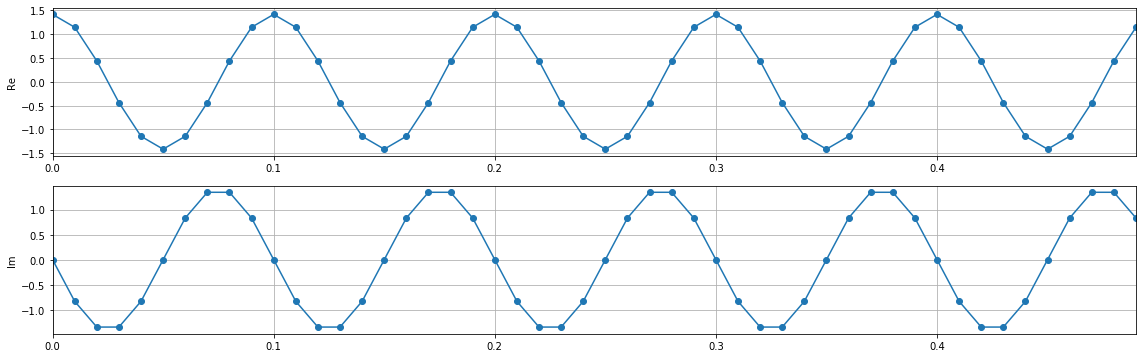

10.000000000000002

In [13]:
x = 0.3
vector = R1L2.bases.at(x, 'p')
vector.image.show(style='-o')  # vector with momentum `R1L2.fourier_labels[0.3]`
(2*numpy.pi/abs(R1L2.fourier_label(x)))/R1L2.bases.measure  # wavelength/measure

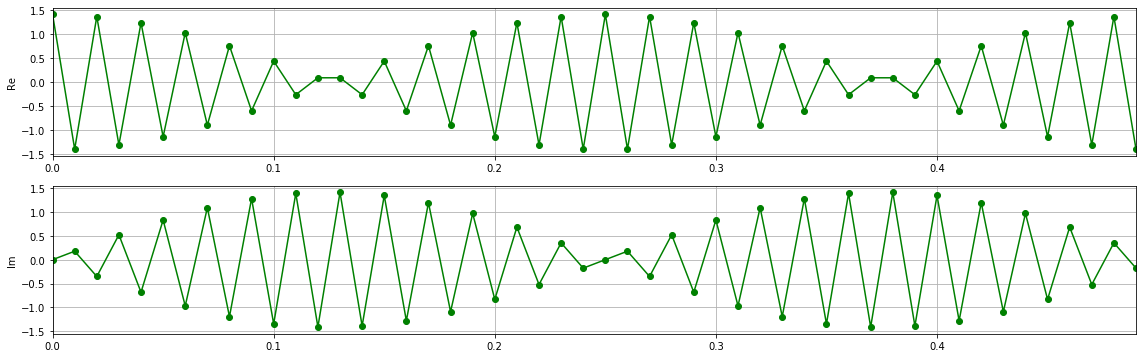

2.083333333333333

In [15]:
# Small wavelength Fourier vectors look different from pure sin/cos because of the finite measure
x = 0.01
R1L2[x, 'fourier'].image.show(style='g-o')
(2*numpy.pi/abs(R1L2.fourier_label(x)))/R1L2.bases.measure  # wavelength/measure

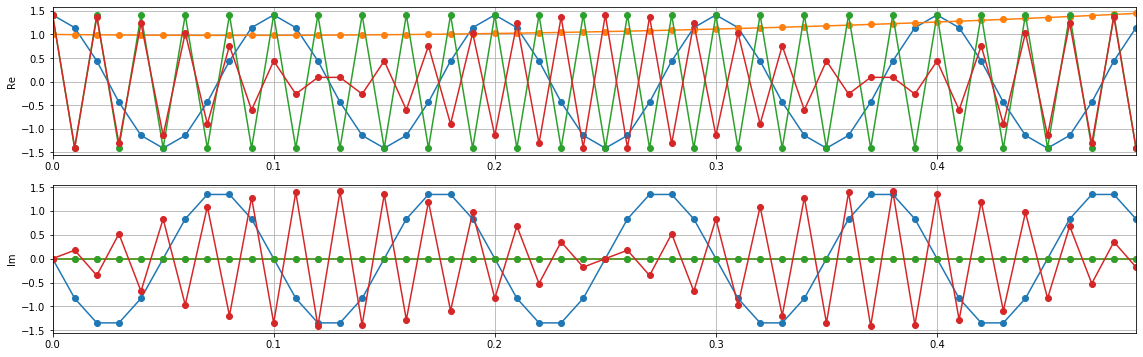

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bb4c12048>,
       dtype=object))

In [16]:
R1L2.show_vectors(vector, w, *R1L2[0:0.01, 'fourier'], style='-o')  # plot arbitrary vectors together

In [17]:
assert (R1L2.Id@F == F, F@R1L2.Id == F) == (True,)*2  # identity operator

In [18]:
# Operator comparisons
assert all((
    (abs(F + 10) >= 1/abs(F + 10)).all().all(),
    (abs(F) + 1 > abs(F)).all().all(),
    (abs(F) < 1 + abs(F)).all().all(),
    (abs(F) <= 1 + abs(F)).all().all(),
    F == F, F != F**2, F != 3, F != F.o))

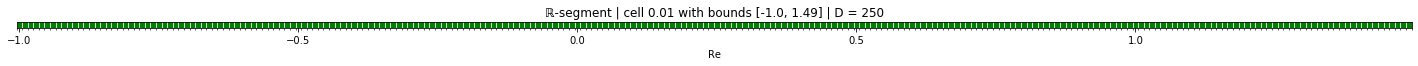

(<Figure size 1800x72 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bb66723c8>)

In [19]:
# Space and bases extension
assert R1L2.bases.dimension == 50
assert R1L2.bases.bounds == [0, 0.49]

R1L2.extend(copies=2)  # extend the space by replication in both directions

assert R1L2.bases.dimension == (2*2 + 1)*50
assert R1L2.bases.bounds == [-1, 1.49]

R1L2.bases.plot_domain()  # new domain

In [20]:
R1L2.bases.o['fourier'].dropna()  # Fourier vectors have been spread according to momentum parameter

-1.00      (0.6324555320336758)exp(314.1592653589793j)x
-0.95     (0.6324555320336758)exp(301.59289474462014j)x
-0.90     (0.6324555320336758)exp(289.02652413026095j)x
-0.85     (0.6324555320336758)exp(276.46015351590177j)x
-0.80      (0.6324555320336758)exp(263.8937829015426j)x
-0.75     (0.6324555320336758)exp(251.32741228718345j)x
-0.70     (0.6324555320336758)exp(238.76104167282426j)x
-0.65      (0.6324555320336758)exp(226.1946710584651j)x
-0.60     (0.6324555320336758)exp(213.62830044410592j)x
-0.55     (0.6324555320336758)exp(201.06192982974676j)x
-0.50     (0.6324555320336758)exp(188.49555921538757j)x
-0.45     (0.6324555320336758)exp(175.92918860102844j)x
-0.40     (0.6324555320336758)exp(163.36281798666926j)x
-0.35     (0.6324555320336758)exp(150.79644737231007j)x
-0.30     (0.6324555320336758)exp(138.23007675795085j)x
-0.25     (0.6324555320336758)exp(125.66370614359172j)x
-0.20     (0.6324555320336758)exp(113.09733552923255j)x
-0.15     (0.6324555320336758)exp(100.5309649148

In [21]:
assert len(R1L2.bases.o['delta'].dropna().index) == len(R1L2.bases.o['fourier'].dropna().index) == 50

In [22]:
assert R1L2.translate(vector, 0.1) == R1L2.translate(vector, -4.9)  # Cyclical translation

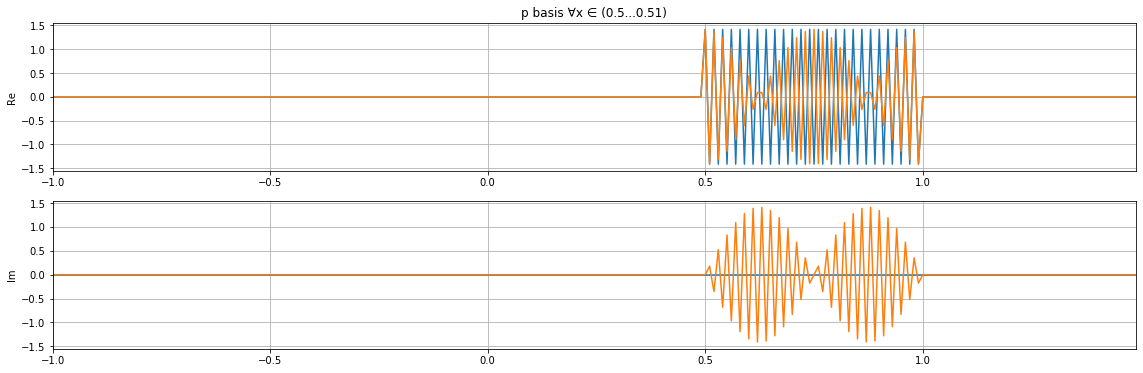

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bb6aa89b0>,
       dtype=object))

In [23]:
R1L2.show_basis_slice('p', 0.5, 0.51)  # non-analytic 'p' basis is extended by replication (translation)

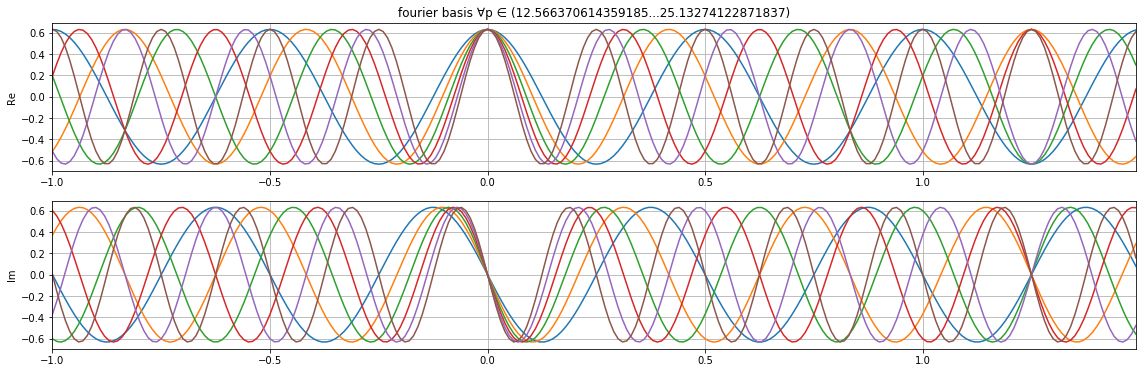

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bb4809d68>,
       dtype=object))

In [24]:
R1L2.show_basis_slice('fourier', 0.3, 0.35)  # 'fourier' basis is extended analytically

In [25]:
R1L2[:, 'delta'], R1L2[:, 'fourier']  # extends both bases completely
R1L2.bases.o['p']

-1.00    \n-1.00    1.414214+0.000000j\n-0.99   -1.4142...
-0.99    \n-1.00    1.414214+0.000000j\n-0.99   -1.4030...
-0.98    \n-1.00    1.414214+0.000000j\n-0.99   -1.3697...
-0.97    \n-1.00    1.414214+0.000000j\n-0.99   -1.3149...
-0.96    \n-1.00    1.414214+0.000000j\n-0.99   -1.2392...
                               ...                        
 1.45    \n-1.00    0.000000+0.000000j\n-0.99    0.0000...
 1.46    \n-1.00    0.000000+0.000000j\n-0.99    0.0000...
 1.47    \n-1.00    0.000000+0.000000j\n-0.99    0.0000...
 1.48    \n-1.00    0.000000+0.000000j\n-0.99    0.0000...
 1.49    \n-1.00    0.000000+0.000000j\n-0.99    0.0000...
Name: p, Length: 250, dtype: object

In [26]:
assert R1L2.is_basis('p')
assert R1L2.is_orthonormal('p')

In [27]:
assert R1L2.is_basis('fourier')
assert R1L2.is_orthonormal('fourier')